In [15]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image, ImageOps
import glob
from IPython import display
from IPython.display import display
import numpy as np
from pathlib import Path
import math
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import mnist
from keras.utils import np_utils, to_categorical
import pyocr
import pyocr.builders
import sys
from pyzbar.pyzbar import decode

In [16]:
# mylibから関数呼び出し
from mylib_ty import preprocess
from mylib_ty import recognition
from mylib_ty import angle_numblock12
from mylib_ty import barcode_mark

In [17]:
# 認識する"i.jpg"の指定
i=14

In [18]:
# 行程一覧

#1 元となるjpg読み込み　
#2 角度補正　　
#3 手書き数字認識（薬剤量）
    # 手書き数字領域の切り取り、数字毎のファイル作成
#===================================================
    # 数字ファイルの前処理
    # kerasを用いたMNISTの機械学習
    # 数字認識の実行
    # 認識した数字をCSVに出力
#===================================================
#4 バーコードとマークシート
    # バーコード認識
    # 固有番号の認識
    # マークシート認識
    # マークシート・バーコード・固有番号をCSVファイルに出力
#5 #3と#4のCSVファイルのマージ

#6 jpg複数枚で上記を実施

In [19]:
# 必要な変数の定義

# 手書き領域の切り取り行と列
rows = 4  # 行数
cols = 3  # 列数

# 前処理に必要な変数
new_size = (88, 88)
pad = 5

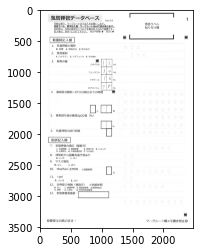

In [20]:
# 元となるjpg読み込み
os.chdir('/Users/tyama/Desktop/marksheet/')
scan = f"{i:05d}.jpg"
img = cv2.imread(scan)
plt.imshow(img, cmap="gray")
plt.show()

In [21]:
# 角度補正の実行
angle_numblock12.rotatefile(i)

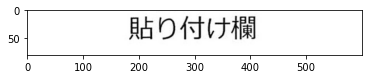

error
認識された固有番号: 00001


,fileno,no,ID,loc,drug,NaN1,NaN2,NaN3,NaN4,dur_1,...,att,NaN5,ind,dam,mask,mlemon,igel,comp,NaN6,empty
0,00014,00001,error,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# バーコード・マークシートの認識 
# CSV出力
barcode_mark.barcodemark(i)

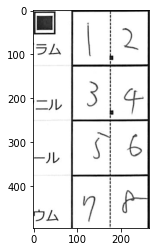

In [24]:
# 手書き数字ファイル薬剤量エリアの切り取り
os.chdir('/Users/tyama/Desktop/marksheet/')
angle_numblock12.trim_tegaki(i)

In [25]:
# 12枚の数字ファイルの作成とトリミング
angle_numblock12.makenum_trim(i)

二値化


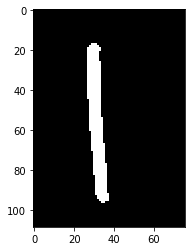

重心移動とリサイズ


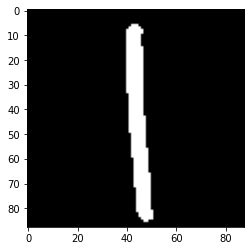

モルフォロジー変換


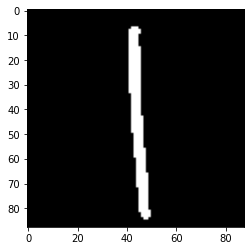

前処理完了画像_tegaki_01_prepro


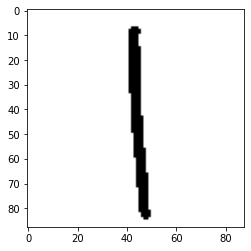

二値化


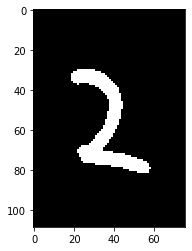

重心移動とリサイズ


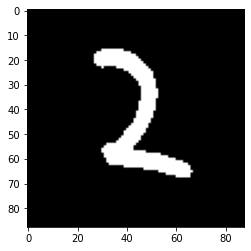

モルフォロジー変換


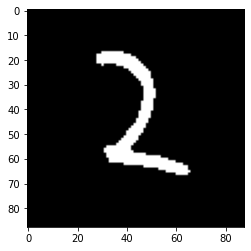

前処理完了画像_tegaki_02_prepro


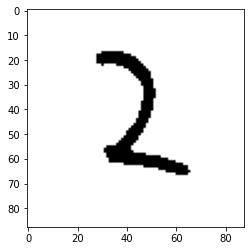

二値化


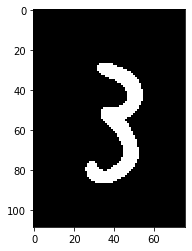

重心移動とリサイズ


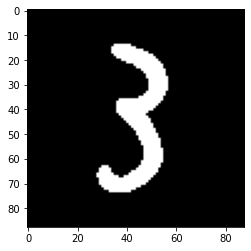

モルフォロジー変換


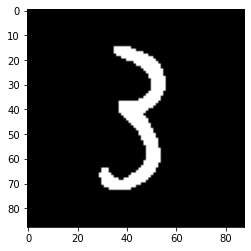

前処理完了画像_tegaki_04_prepro


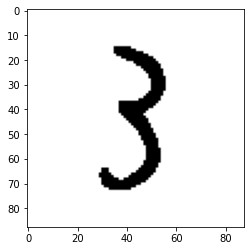

二値化


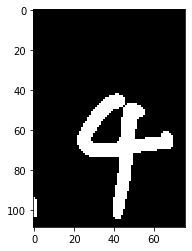

重心移動とリサイズ


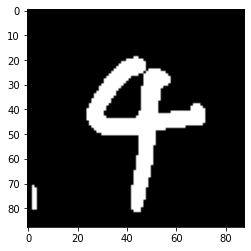

モルフォロジー変換


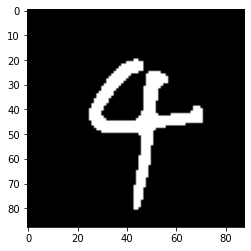

前処理完了画像_tegaki_05_prepro


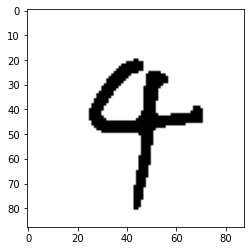

二値化


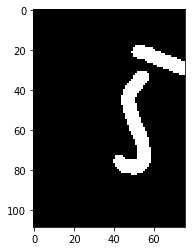

重心移動とリサイズ


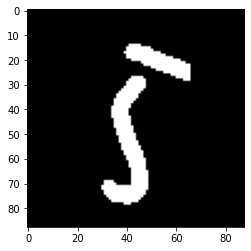

モルフォロジー変換


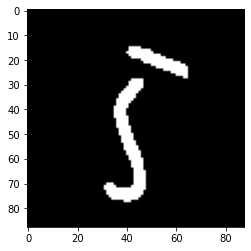

前処理完了画像_tegaki_07_prepro


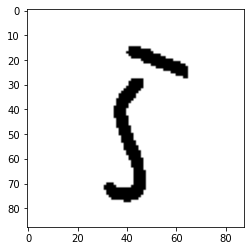

二値化


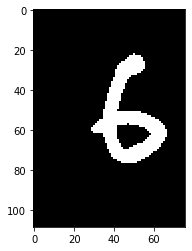

重心移動とリサイズ


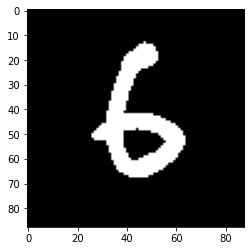

モルフォロジー変換


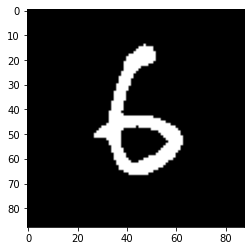

前処理完了画像_tegaki_08_prepro


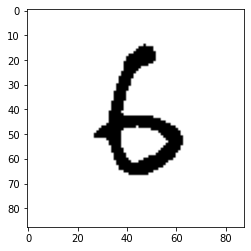

二値化


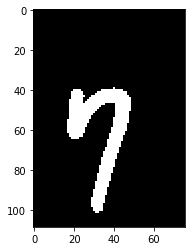

重心移動とリサイズ


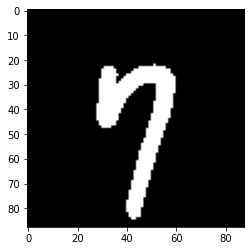

モルフォロジー変換


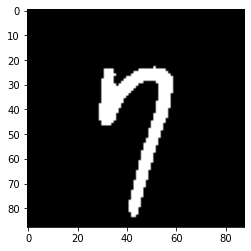

前処理完了画像_tegaki_10_prepro


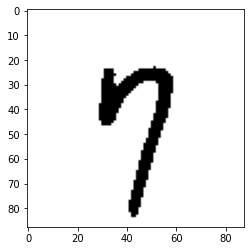

二値化


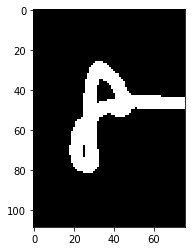

重心移動とリサイズ


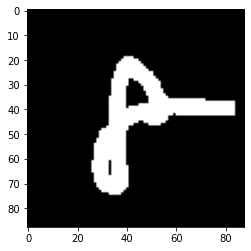

モルフォロジー変換


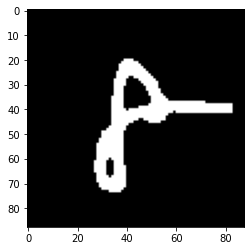

前処理完了画像_tegaki_11_prepro


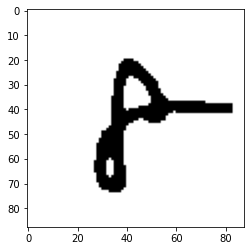

In [26]:
# preprocess実行
os.chdir('/Users/tyama/Desktop/marksheet')
if os.path.exists(f'/Users/tyama/Desktop/marksheet/num_output_{i:05d}/'):
    os.chdir(f'/Users/tyama/Desktop/marksheet/num_output_{i:05d}/')
    for k in range(0,12):
        if os.path.exists(f'tegaki_{k:02d}.jpg'):
            try:
                preprocess.preprocessing(k)
            except IndexError:
                None

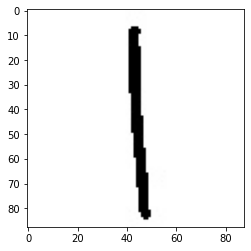

1/1 [==============================] - 0s 94ms/step
predict_y: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
predict_number: 1
probability_number: 1.0
****************************************


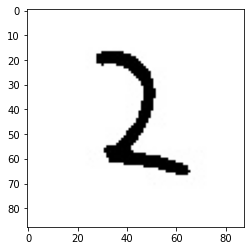

1/1 [==============================] - 0s 76ms/step
predict_y: [0.    0.    0.999 0.001 0.    0.    0.    0.    0.    0.   ]
predict_number: 2
probability_number: 0.999
****************************************


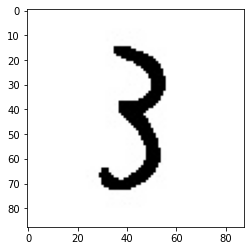

1/1 [==============================] - 0s 99ms/step
predict_y: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
predict_number: 3
probability_number: 1.0
****************************************


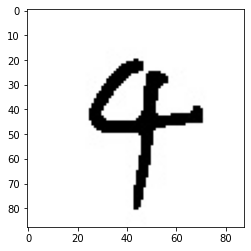

1/1 [==============================] - 0s 92ms/step
predict_y: [0.    0.    0.    0.    0.999 0.    0.    0.    0.    0.001]
predict_number: 4
probability_number: 0.999
****************************************


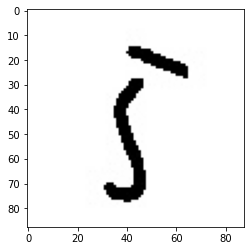

1/1 [==============================] - 0s 101ms/step
predict_y: [0.    0.    0.    0.    0.    0.998 0.    0.    0.001 0.001]
predict_number: 5
probability_number: 0.998
****************************************


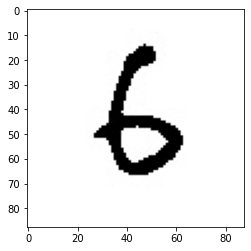

1/1 [==============================] - 0s 110ms/step
predict_y: [0.    0.    0.    0.    0.    0.019 0.98  0.    0.    0.   ]
predict_number: 6
probability_number: 0.98
****************************************


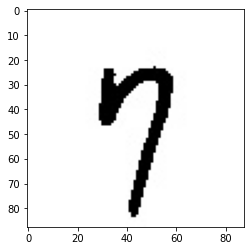

1/1 [==============================] - 0s 94ms/step
predict_y: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
predict_number: 7
probability_number: 1.0
****************************************


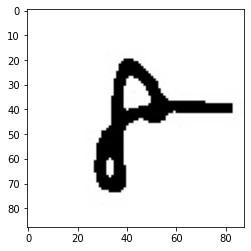

1/1 [==============================] - 0s 91ms/step
predict_y: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
predict_number: 8
probability_number: 1.0
****************************************


In [27]:
# for構文で12枚数字認識、エラーは0を表示、list作成
result = []
if __name__ == '__main__':
    result.append(f'{i:05d}')
    for k in range(0, 12):        
        if (k % 3) == 0: # kを3で割った余りが0のとき
            continue
        try:
            predict_number, probability_number = recognition.recognizing(i, k)
            result.append(predict_number)
            result.append(probability_number)
        except TypeError:
            print("predict_number error: emp")
            result.append("emp")
            result.append("emp")
            print("****************************************")

In [28]:
print(result)

['00014', 1, 1.0, 2, 0.999, 3, 1.0, 4, 0.999, 5, 0.998, 6, 0.98, 7, 1.0, 8, 1.0]


In [29]:
# CSV出力
import pandas as pd 
df4 = pd.DataFrame(
data = [result], 
columns = ["No", 'm1', 'p_m1', 'm2','p_m2', 'f1', 'p_f1','f2', 'p_f2', 'k1', 'p_k1','k2', 'p_k2', 'r1', 'p_r1','r2', 'p_r2']
)

display(df4)
os.chdir('/Users/tyama/Desktop/marksheet/tegakicsv')
df4.to_csv(f'tegaki_{i:05d}.csv')

,No,m1,p_m1,m2,p_m2,f1,p_f1,f2,p_f2,k1,p_k1,k2,p_k2,r1,p_r1,r2,p_r2
0,00014,1,1.0,2,0.999,3,1.0,4,0.999,5,0.998,6,0.98,7,1.0,8,1.0


In [ ]:
# ==課題==
# 認識した数字の確率が知りたい